In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE


### Project OverView
This internship project focuses on developing a robust machine learning-based fraud detection
system for Fastag transactions. Fastag is an electronic toll collection system in India that uses
RFID technology to make toll payments directly from a prepaid account linked to a user’s vehicle.
As digital transactions become more prevalent, the risk of fraudulent activities also increases. This
project aims to leverage machine learning classification techniques to accurately identify fraudulent
transactions, thereby ensuring the security and integrity of Fastag transactions.

In [10]:
data = pd.read_csv("FastagFraudDetection.csv")
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


### Dataset Description

The dataset comprises various features related to Fastag transactions, including transaction details,
vehicle information, geographical location, and transaction amounts. The key features are:

Transaction_ID: Unique identifier for each transaction.                                
Timestamp: Date and time of the transaction.                                
Vehicle_Type: Type of vehicle involved in the transaction.                                         
FastagID: Unique identifier for Fastag.                                 
TollBoothID: Identifier for the toll booth.                                          
Lane_Type: Type of lane used for the transaction.                                         
Vehicle_Dimensions: Dimensions of the vehicle.                                                     
Transaction_Amount: Amount associated with the transaction.                                            
Amount_paid: Amount paid for the transaction.                                                       
Geographical_Location: Location details of the transaction.                                              
Vehicle_Speed: Speed of the vehicle during the transaction.                                             
Vehicle_Plate_Number: License plate number of the vehicle.                                                      
Fraud_indicator: Binary indicator of fraudulent activity (target variable).                                 

In [13]:
data.shape

(5000, 13)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         4451 non-null   int64 
 1   Timestamp              4451 non-null   object
 2   Vehicle_Type           4451 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            4451 non-null   object
 5   Lane_Type              4451 non-null   object
 6   Vehicle_Dimensions     4451 non-null   object
 7   Transaction_Amount     4451 non-null   int64 
 8   Amount_paid            4451 non-null   int64 
 9   Geographical_Location  4451 non-null   object
 10  Vehicle_Speed          4451 non-null   int64 
 11  Vehicle_Plate_Number   4451 non-null   object
 12  Fraud_indicator        4451 non-null   object
dtypes: int64(4), object(9)
memory usage: 486.8+ KB


In [15]:
data.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [21]:
data.Fraud_indicator.value_counts()

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64

> we can drop all the row which don't have any fastTag id

In [23]:
data[data.Fraud_indicator == 'Fraud'].isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [31]:
data[data.duplicated(['FastagID', 'Vehicle_Plate_Number'])]

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator


In [33]:
data.dropna(inplace=True)

In [35]:
data.shape

(4451, 13)

In [37]:
data.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [45]:
data.describe(include='all')

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
count,4451.000000,4451,4451,4451,4451,4451,4451,4451.000000,4451.000000,4451,4451.000000,4451,4451
unique,NaN,4008,7,4451,4,2,3,NaN,NaN,5,NaN,4451,2
top,NaN,1/1/2023 8:15,Bus,FTG-001-ABC-121,B-102,Regular,Large,NaN,NaN,"12.84197701525119, 77.67547528176169",NaN,KA11AB1234,Not Fraud
freq,NaN,5,716,1,1432,2309,2144,NaN,NaN,927,NaN,1,3468
mean,2466.227140,NaN,NaN,NaN,NaN,NaN,NaN,180.927881,158.684565,NaN,67.884745,NaN,NaN
std,1428.941144,NaN,NaN,NaN,NaN,NaN,NaN,103.004437,99.857565,NaN,16.632295,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,10.000000,NaN,NaN
25%,1254.500000,NaN,NaN,NaN,NaN,NaN,NaN,110.000000,100.000000,NaN,55.000000,NaN,NaN
50%,2405.000000,NaN,NaN,NaN,NaN,NaN,NaN,140.000000,120.000000,NaN,67.000000,NaN,NaN
75%,3702.500000,NaN,NaN,NaN,NaN,NaN,NaN,300.000000,180.000000,NaN,82.000000,NaN,NaN


### Data Visualization

Visualize the distribution of the target variable

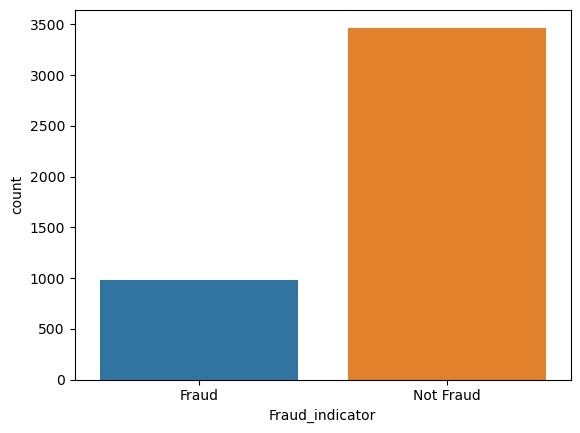

In [39]:
sns.countplot(x='Fraud_indicator', data=data)
plt.show()

Visualize the distribution of Transaction Amounts

C:\Users\vipin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


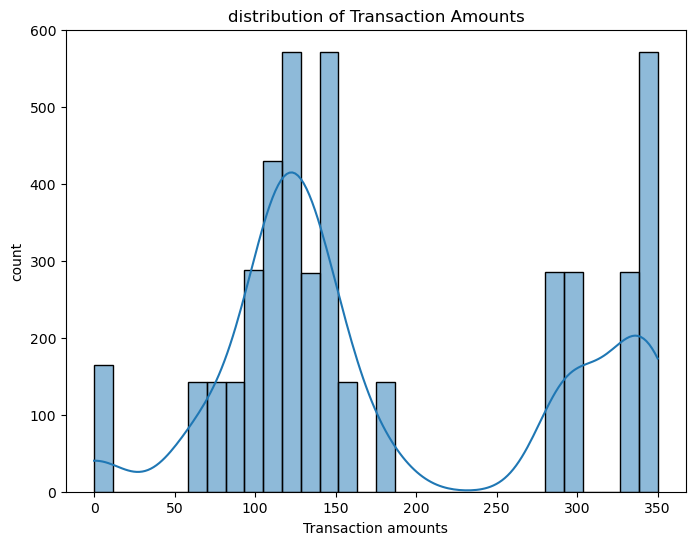

In [56]:
plt.figure(figsize=(8,6))
sns.histplot(data['Transaction_Amount'],bins=30,kde = True)
plt.title('distribution of Transaction Amounts')
plt.xlabel('Transaction amounts')
plt.ylabel('count')
plt.show()

Visualize the distribution of Amount Paid

C:\Users\vipin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


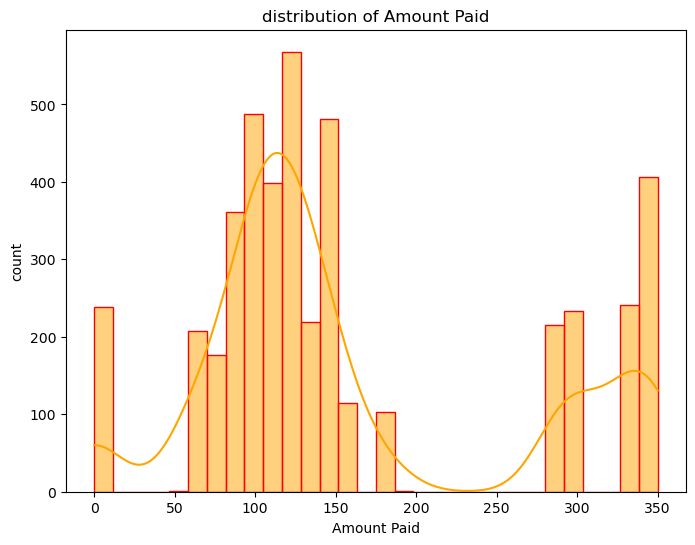

In [65]:
plt.figure(figsize=(8,6))
sns.histplot(data['Amount_paid'],bins=30,kde = True,color='orange', edgecolor='red')
plt.title('distribution of Amount Paid')
plt.xlabel('Amount Paid')
plt.ylabel('count')
plt.show()


Visualize the distribution of Vehicle Speed

C:\Users\vipin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


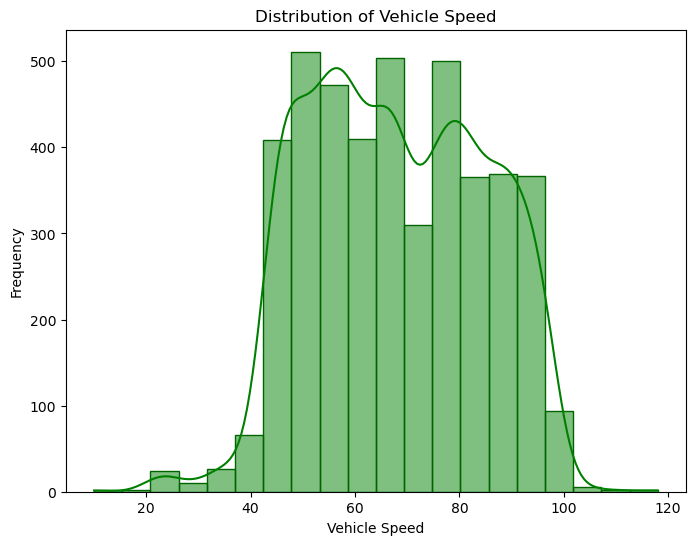

In [70]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Vehicle_Speed'], bins=20, kde=True,color='green',edgecolor = 'darkgreen' )
plt.title('Distribution of Vehicle Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')
plt.show()

Visualize the relationship between Transaction Amount and Amount Paid

Text(0.5, 1.0, 'Transaction Amount vs Amount Paid')

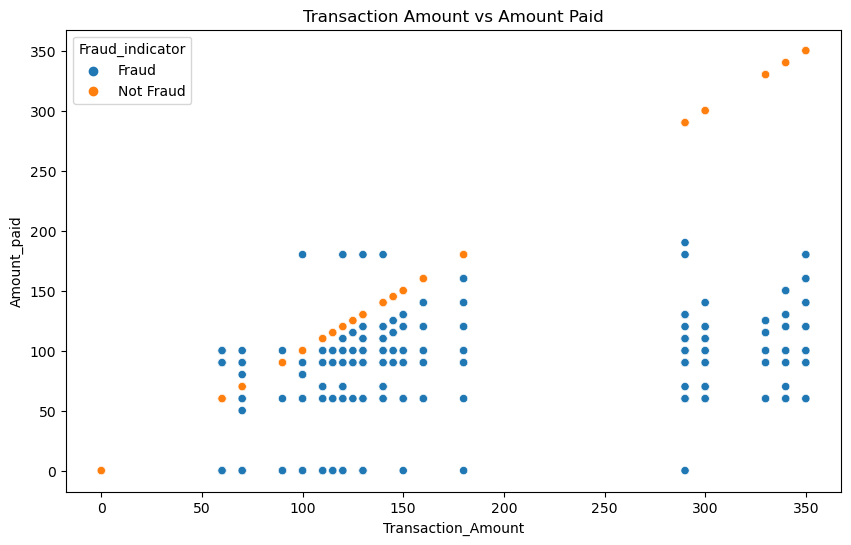

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Transaction_Amount',y = 'Amount_paid',hue = 'Fraud_indicator', data=data)
plt.title('Transaction Amount vs Amount Paid')


Countplots for Vehicle Type variables by fraud indicator


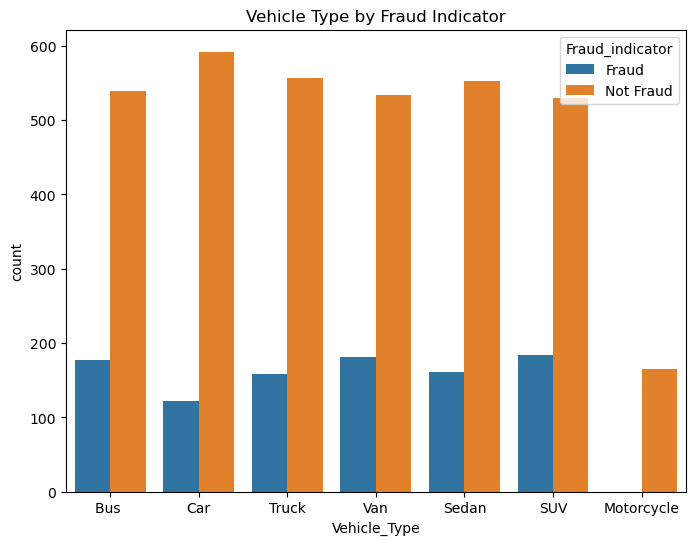

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle_Type', hue='Fraud_indicator', data=data)
plt.title('Vehicle Type by Fraud Indicator')
plt.show()


Countplots for Lane type variables by fraud indicator

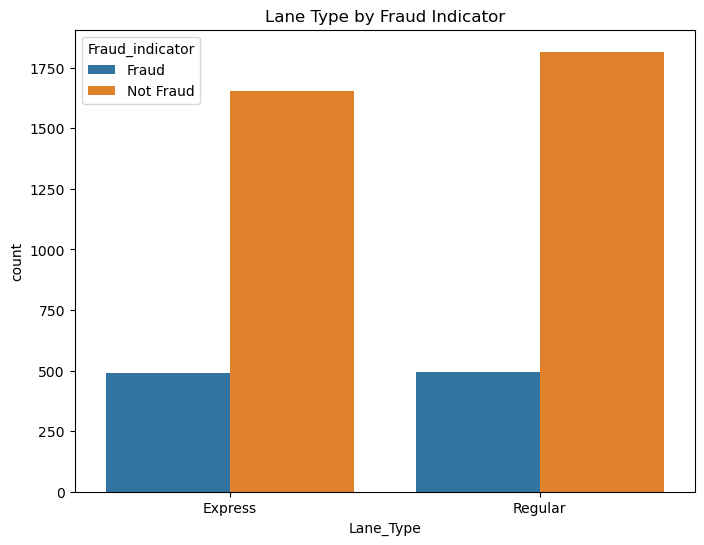

In [89]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Lane_Type', hue='Fraud_indicator', data=data)
plt.title('Lane Type by Fraud Indicator')
plt.show()

Countplots for Geographical Location variables by fraud indicator

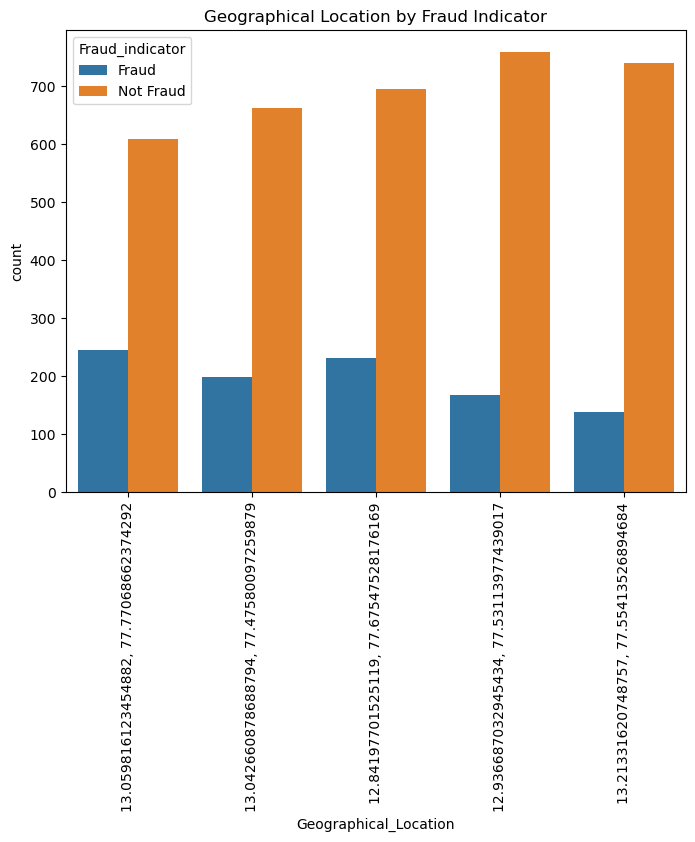

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geographical_Location', hue='Fraud_indicator', data=data)
plt.title('Geographical Location by Fraud Indicator')
plt.xticks(rotation=90)
plt.show()


C:\Users\vipin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vipin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vipin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vipin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

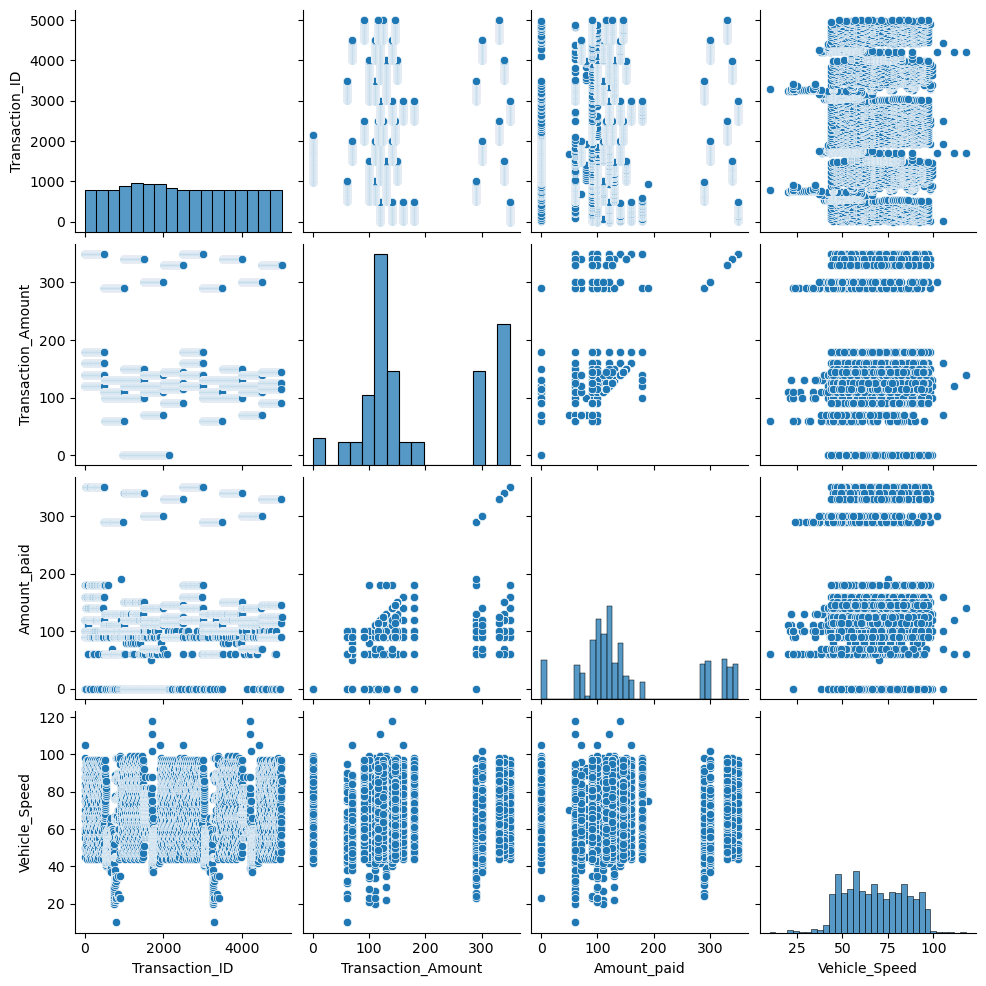

In [72]:
sns.pairplot(data)

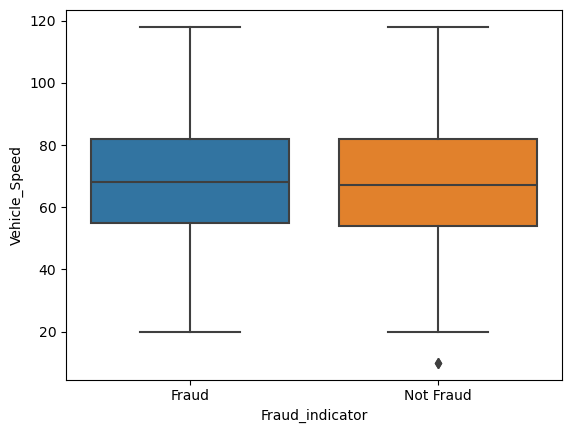

In [74]:
sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=data)
plt.show()

In [102]:
df1 = data.select_dtypes('number')
df1

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
0,1,350,120,65
1,2,120,100,78
3,4,350,120,92
4,5,140,100,60
5,6,160,100,105
...,...,...,...,...
4995,4996,330,330,81
4996,4997,125,125,64
4997,4998,115,115,93
4998,4999,145,145,57


In [104]:
df1.corr()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
Transaction_ID,1.000000,0.013007,0.091892,0.012968
Transaction_Amount,0.013007,1.000000,0.831275,0.061599
Amount_paid,0.091892,0.831275,1.000000,0.043446
Vehicle_Speed,0.012968,0.061599,0.043446,1.000000


<Axes: >

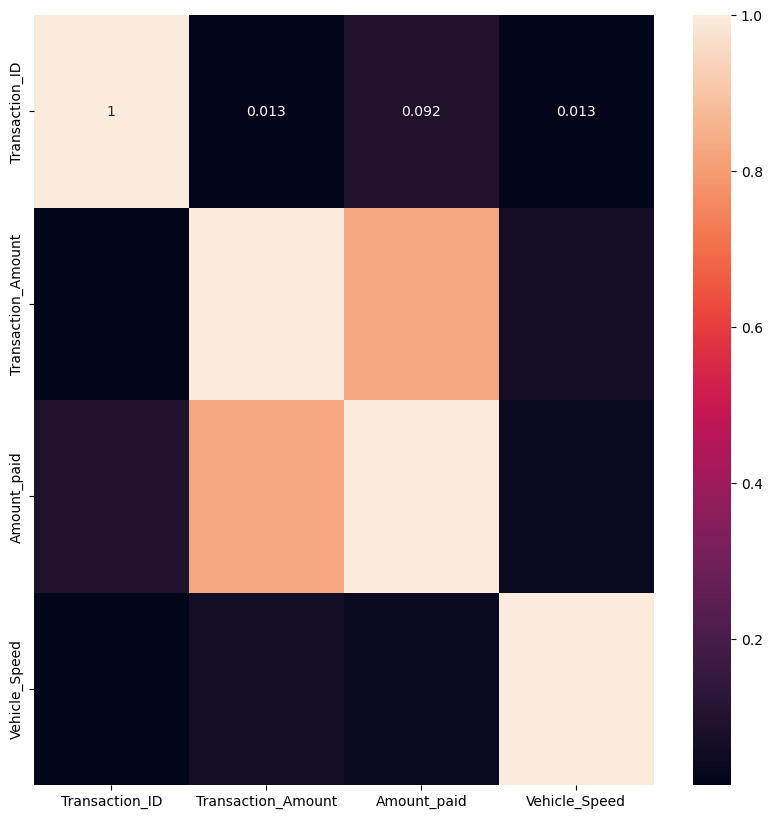

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot = True)

In [110]:
correlation_max = data['Transaction_Amount'].corr(data['Amount_paid'])
correlation_max

0.8312749747685364

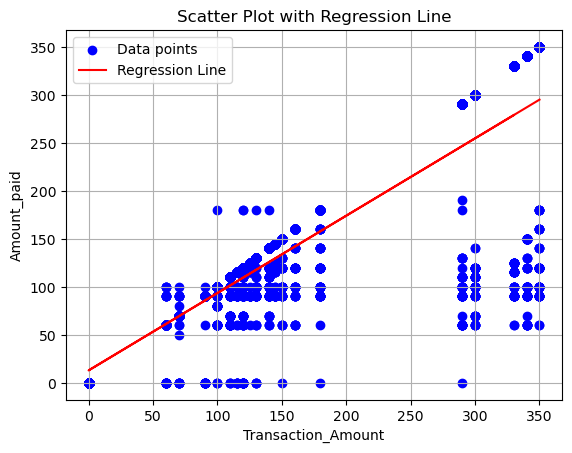

In [112]:
# Calculate the regression line
coefficients = np.polyfit(data['Transaction_Amount'], data['Amount_paid'], 1)
regression_line = np.polyval(coefficients, data['Transaction_Amount'])

# Plot a scatter plot with the regression line
plt.scatter(data['Transaction_Amount'], data['Amount_paid'], color='blue', label='Data points')
plt.plot(data['Transaction_Amount'], regression_line, color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Transaction_Amount')
plt.ylabel('Amount_paid')
plt.legend()
plt.grid(True)
plt.show()

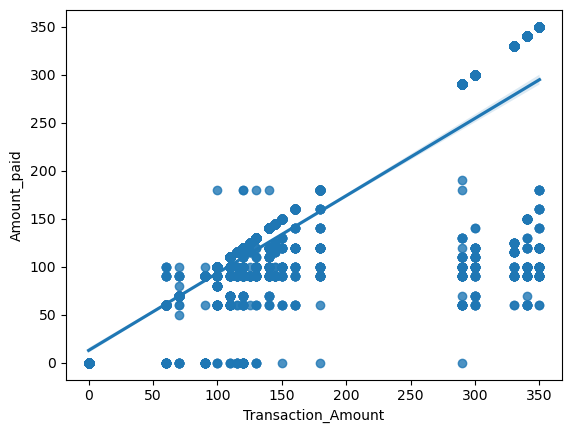

In [114]:
# Scatter plot with regression line between 'Transaction_Amount' and 'Amount_paid'
sns.regplot(x='Transaction_Amount', y='Amount_paid', data=data)
plt.show()


In [116]:
df = data.copy()
df.head(3)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud


Label Encoding for Categorical Features: Ensure that categorical features are encoded

In [119]:
label_encoders = {}
categorical_columns = ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number','Fraud_indicator','FastagID','TollBoothID']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [121]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,0,2,0,0,0,350,120,3,65,1327,0
1,2,1/7/2023 14:55,1,9,1,1,2,120,100,3,78,2748,0
3,4,1/9/2023 2:05,5,241,2,1,0,350,120,3,92,1341,0
4,5,1/10/2023 6:35,6,2860,1,0,1,140,100,3,60,2155,0
5,6,1/11/2023 10:00,4,402,0,1,1,160,100,3,105,3031,0


##### Feature Extraction: Additional time-based features (Hour,Day, Month, Weekday) have been extracted from the Timestamp.

In [125]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday
df.sample(6)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
868,869,2023-03-22 02:15:00,0,2764,2,0,0,290,290,2,88,1571,1,2,22,3,2
148,149,2023-02-06 18:55:00,1,1592,0,0,2,120,120,3,51,3550,1,18,6,2,0
4747,4748,2023-05-26 12:51:00,0,1463,2,1,0,330,90,4,96,4295,0,12,26,5,4
939,940,2023-02-06 12:45:00,1,3126,0,1,2,60,60,2,90,2037,1,12,6,2,0
2475,2476,2023-03-13 05:15:00,6,2545,1,1,1,125,125,4,94,3988,1,5,13,3,0
2731,2732,2023-11-24 16:08:00,0,4273,2,1,0,350,350,3,96,2743,1,16,24,11,4


In [127]:
# Drop the original Timestamp column and Transaction_ID as it is not informative
df.drop(columns=['Timestamp', 'Transaction_ID'], inplace=True)

In [129]:
df.head()

,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
0,0,2,0,0,0,350,120,3,65,1327,0,11,6,1,4
1,1,9,1,1,2,120,100,3,78,2748,0,14,7,1,5
3,5,241,2,1,0,350,120,3,92,1341,0,2,9,1,0
4,6,2860,1,0,1,140,100,3,60,2155,0,6,10,1,1
5,4,402,0,1,1,160,100,3,105,3031,0,10,11,1,2


Model Training: Train a variety of machine learning models (e.g., Logistic
Regression, Random Forest, SVM).                   
Model Evaluation: Evaluate model performance using metrics such as
precision, recall, F1 score, and accuracy


In [134]:
x = df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
X_train[0]

array([ 0.89089094, -0.38996363,  1.04527171, -1.05904358, -0.92612694,
        1.44544134,  1.71394018,  1.43539031, -0.9560077 ,  1.32505196,
       -1.23810953, -0.09005089, -0.836556  , -0.50508159])

In [142]:
X_test[0]

array([-1.02720506,  0.67820987, -1.21340342,  0.94424821,  1.66077923,
       -1.17527227, -0.99085935,  0.03212531,  1.31355431, -0.13845997,
        0.08436778, -1.11536385, -1.12775962, -1.49277204])

In [146]:
y_train[:10]

4806    1
4783    0
1363    0
412     0
886     0
3014    0
3201    1
3536    1
2777    1
543     1
Name: Fraud_indicator, dtype: int32

In [148]:
y_test[:10]

939     1
4279    1
2634    1
4675    1
1405    0
4416    1
797     1
154     0
1578    0
1413    1
Name: Fraud_indicator, dtype: int32

### Logistic Regression Model

In [154]:
LR_model = LogisticRegression()LR_model.fit(X_train,y_train)

LogisticRegression()

In [156]:
LR_pred = LR_model.predict(X_test)
LR_pred


array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [177]:
LR_accuracy = accuracy_score(y_test,LR_pred)
conf_matrix = confusion_matrix(y_test,LR_pred)
LR_precision = precision_score(y_test,LR_pred)
LR_recall = recall_score(y_test,LR_pred)
LR_f1_score = f1_score(y_test,LR_pred)
print("Logistic Regression Model Results:")
print('confusion Matrix :',conf_matrix)
print("Accuracy:", LR_accuracy)
print("Precision:", LR_precision)
print("Recall:", LR_recall)
print("F1 Score:", LR_f1_score)

Logistic Regression Model Results:
confusion Matrix : [[161  31]
 [  0 699]]
Accuracy: 0.9652076318742986
Precision: 0.9575342465753425
Recall: 1.0
F1 Score: 0.9783065080475857


In [29]:
print(y_pred_prob[:5])
y_pred[:5]

[[0.95255303]
 [0.94807416]
 [0.95293903]
 [0.95006627]
 [0.19638585]]


array([[1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

### Decision tree classification

In [173]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [175]:
DTC_pred = DTC_model.predict(X_test)
DTC_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [179]:
DTC_accuracy = accuracy_score(y_test, DTC_pred)
conf_matrix = confusion_matrix(y_test ,DTC_pred)
DTC_precision = precision_score(y_test ,DTC_pred)
DTC_recall = recall_score(y_test ,DTC_pred)
DTC_f1_score = f1_score(y_test ,DTC_pred)
print("Logistic Regression Model Results:")
print('confusion Matrix :',conf_matrix)
print("Accuracy:", DTC_accuracy)
print("Precision:", DTC_precision)
print("Recall:", DTC_recall)
print("F1 Score:", DTC_f1_score)

Logistic Regression Model Results:
confusion Matrix : [[189   3]
 [  4 695]]
Accuracy: 0.9921436588103255
Precision: 0.995702005730659
Recall: 0.994277539341917
F1 Score: 0.9949892627057981


### Random Forest

In [182]:
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train,y_train)

RandomForestClassifier()

In [184]:
RFC_pred = RFC_model.predict(X_test)
RFC_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [186]:
RFC_accuracy = accuracy_score(y_test, RFC_pred)
conf_matrix = confusion_matrix(y_test, RFC_pred)
RFC_precision = precision_score(y_test, RFC_pred)
RFC_recall = recall_score(y_test, RFC_pred)
RFC_f1_score = f1_score(y_test, RFC_pred)
print("Logistic Regression Model Results:")
print('confusion Matrix :',conf_matrix)
print("Accuracy:", RFC_accuracy)
print("Precision:", RFC_precision)
print("Recall:", RFC_recall)
print("F1 Score:", RFC_f1_score)

Logistic Regression Model Results:
confusion Matrix : [[173  19]
 [  0 699]]
Accuracy: 0.978675645342312
Precision: 0.9735376044568245
Recall: 1.0
F1 Score: 0.986591390261115


###  Support vector Machine

In [189]:
from sklearn.svm import SVC

In [191]:
SVM_model = SVC()
SVM_model.fit(X_train,y_train)

SVC()

In [195]:
SVM_pred = SVM_model.predict(X_test)
SVM_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [197]:
SVM_accuracy = accuracy_score(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred)
SVM_recall = recall_score(y_test, SVM_pred)
SVM_f1_score = f1_score(y_test, SVM_pred)
print("Logistic Regression Model Results:")
print('confusion Matrix :',conf_matrix)
print("Accuracy:", SVM_accuracy)
print("Precision:", SVM_precision)
print("Recall:", SVM_recall)
print("F1 Score:", SVM_f1_score)

Logistic Regression Model Results:
confusion Matrix : [[137  55]
 [  0 699]]
Accuracy: 0.9382716049382716
Precision: 0.9270557029177718
Recall: 1.0
F1 Score: 0.9621472814865796


### Naive bayes classifier

In [202]:
from sklearn.naive_bayes import GaussianNB

In [206]:
NBC_model = GaussianNB()
NBC_model.fit(X_train,y_train)

GaussianNB()

In [208]:
NBC_pred = NBC_model.predict(X_test)
NBC_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,

In [234]:
NBC_accuracy = accuracy_score(y_test, NBC_pred)
conf_matrix = confusion_matrix(y_test, NBC_pred)
NBC_precision = precision_score(y_test, NBC_pred)
NBC_recall = recall_score(y_test, NBC_pred)
NBC_f1_score = f1_score(y_test, NBC_pred)
print("NBC Model Results:")
print('confusion Matrix :',conf_matrix)
print("Accuracy:", NBC_accuracy)
print("Precision:", NBC_precision)
print("Recall:", NBC_recall)
print("F1 Score:", NBC_f1_score)

NBC Model Results:
confusion Matrix : [[115  77]
 [ 64 635]]
Accuracy: 0.8417508417508418
Precision: 0.8918539325842697
Recall: 0.9084406294706724
F1 Score: 0.9000708717221829


### K Neighbors Classifier

In [215]:
from sklearn.neighbors import KNeighborsClassifier

In [217]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [219]:
from sklearn.model_selection import GridSearchCV

In [223]:
knn_cv_grid = GridSearchCV(KNN, parameters, scoring='accuracy', cv=10)
kNN_model = knn_cv_grid.fit(X_train, y_train)

In [225]:
kNN_model_best_score = kNN_model.best_score_
print("Tuned Hpyerparameters :(best parameters) ",kNN_model.best_params_)
print("Best Score :",kNN_model_best_score)

Tuned Hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
Best Score : 0.8550561797752809


In [227]:
kNN_pred = kNN_model.predict(X_test)
kNN_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [232]:
kNN_accuracy = accuracy_score(y_test, kNN_pred)
conf_matrix = confusion_matrix(y_test, kNN_pred)
kNN_precision = precision_score(y_test, kNN_pred)
kNN_recall = recall_score(y_test, kNN_pred)
kNN_f1_score = f1_score(y_test, kNN_pred)
print("kNN Model Results:")
print('confusion Matrix :',conf_matrix)
print("Accuracy:", kNN_accuracy)
print("Precision:", kNN_precision)
print("Recall:", kNN_recall)
print("F1 Score:", kNN_f1_score)

kNN Model Results:
confusion Matrix : [[ 82 110]
 [ 13 686]]
Accuracy: 0.8619528619528619
Precision: 0.8618090452261307
Recall: 0.9814020028612304
F1 Score: 0.9177257525083613


### Compairing the Models - based on scores

In [236]:
Algorithms = ['Logistic Regression Model', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support vector Machine', 'Gaussian Naive Bayes', 'K Neighbors Classifier']

Accuracy_Score = [LR_accuracy, DTC_accuracy, RFC_accuracy, SVM_accuracy, NBC_accuracy, kNN_accuracy]

Precision_Score = [LR_precision, DTC_precision, RFC_precision, SVM_precision, NBC_precision, kNN_precision]

F1_Score = [LR_f1_score, DTC_f1_score, RFC_f1_score, SVM_f1_score, NBC_f1_score, kNN_f1_score]

column_names = ['Algorithm', 'Accuracy Score', 'Precision Score','F1 Score']

In [238]:
dff = pd.DataFrame(list(zip(Algorithms, Accuracy_Score, Precision_Score, F1_Score)),columns = column_names)
dff

,Algorithm,Accuracy Score,Precision Score,F1 Score
0,Logistic Regression Model,0.965208,0.957534,0.978307
1,Decision Tree Classifier,0.992144,0.995702,0.994989
2,Random Forest Classifier,0.978676,0.973538,0.986591
3,Support vector Machine,0.938272,0.927056,0.962147
4,Gaussian Naive Bayes,0.841751,0.891854,0.900071
5,K Neighbors Classifier,0.861953,0.861809,0.917726


C:\Users\vipin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


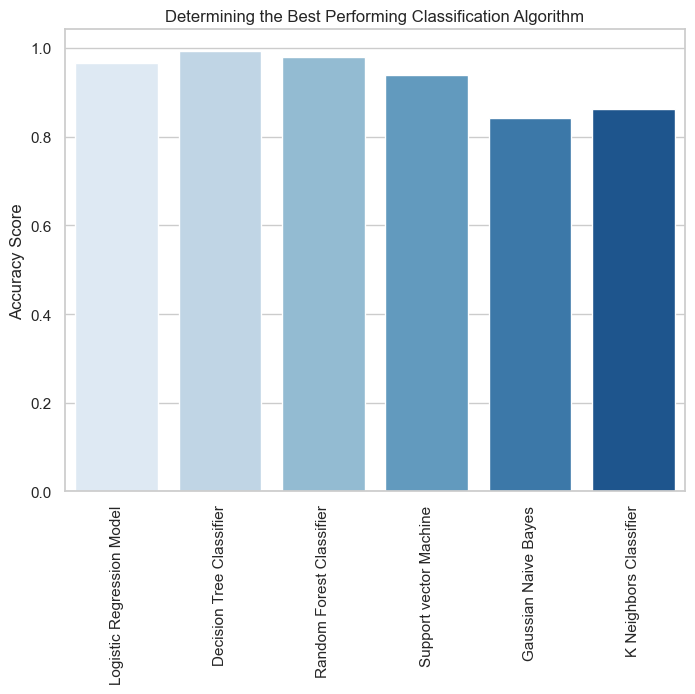

In [244]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
sns.barplot(x=Algorithms, y=Accuracy_Score, palette="Blues")
plt.title("Determining the Best Performing Classification Algorithm")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=90)
plt.show()

C:\Users\vipin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


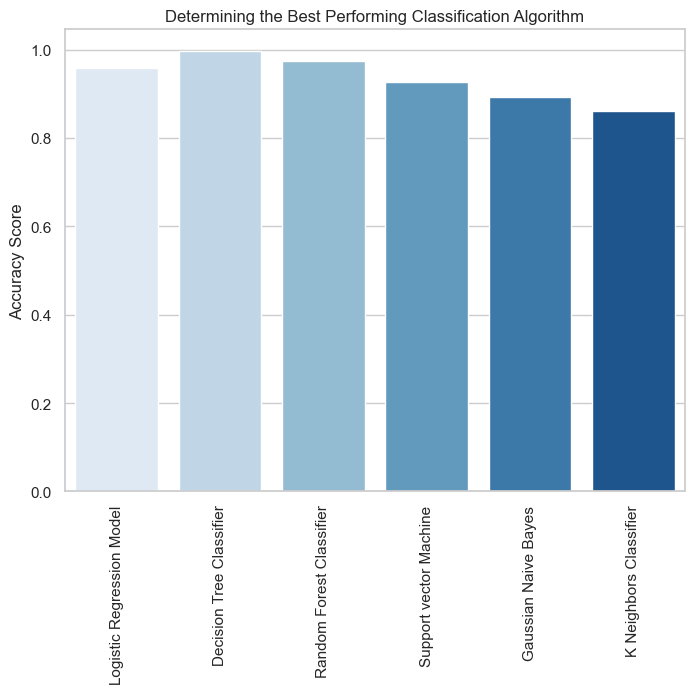

In [246]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
sns.barplot(x=Algorithms, y=Precision_Score, palette="Blues")
plt.title("Determining the Best Performing Classification Algorithm")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=90)
plt.show()

C:\Users\vipin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


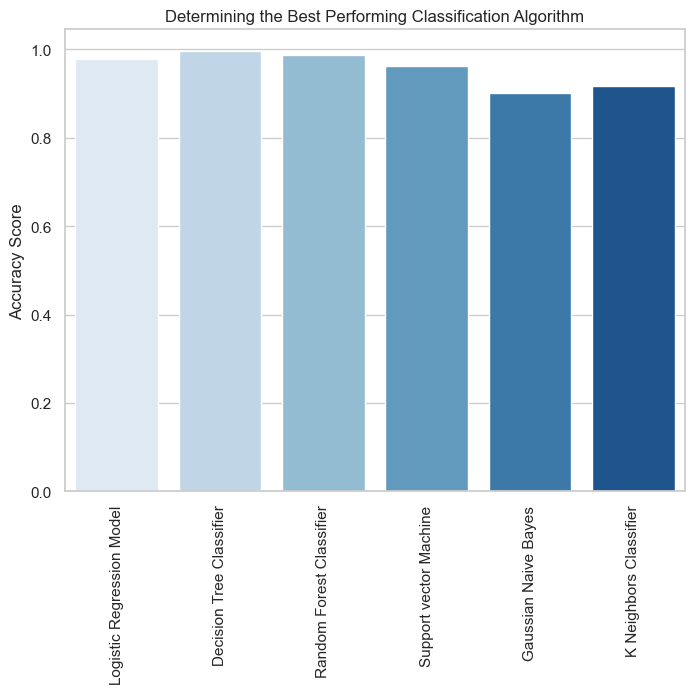

In [248]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
sns.barplot(x=Algorithms, y=F1_Score, palette="Blues")
plt.title("Determining the Best Performing Classification Algorithm")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=90)
plt.show()

## SUMMARY

** Decision Tree stands out as the top model, followed closely by Random Forest and Logistic
Regression. SVM also shows strong performance. KNN exhibit moderate
performance, while Naive Bayes, despite its good precision, shows lower overall performance due
to its lower recall and F1 score. **
